# Import the data set

In [85]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import norm
from scipy import stats
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

HousesSold = pd.read_csv('train.csv')
print(HousesSold['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


The data set is imported. The mean is higher than median implying that SalePrice is right skewed. We need to see how may variables are there in this data set.

In [86]:
print(HousesSold.shape)
print(HousesSold.columns)

(1460, 81)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 

There are 81 variables in total in this data set and a total of 1460 observations

 # *SalePrice*

C:\Users\Amjad Ali\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


Skewness: 1.882876
Kurtosis: 6.536282


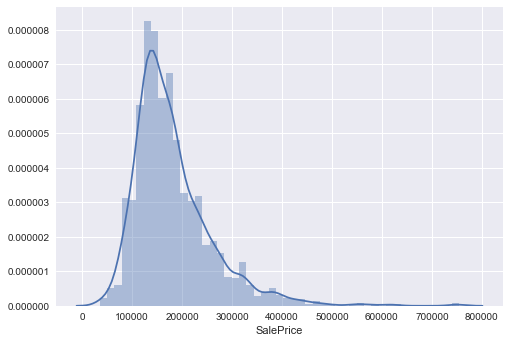

In [87]:
f1=plt.figure()
sb.distplot(HousesSold['SalePrice'])
print("Skewness: %f" % HousesSold['SalePrice'].skew())
print("Kurtosis: %f" % HousesSold['SalePrice'].kurt())
plt.show()

# Heat Map

Variables that are strongly correlated with SalePrice variable can be spotted from the heat map of their correlations with each other.

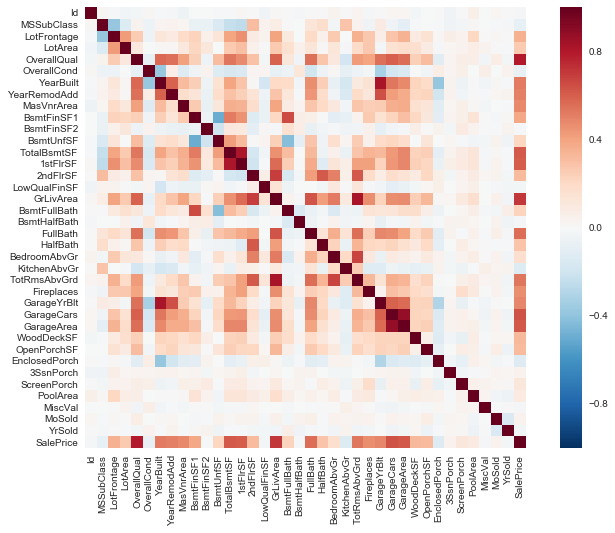

In [88]:
corrmat = HousesSold.corr()
f2=plt.subplots(1, figsize=(12, 9))

# Draw the heatmap using seaborn
sb.heatmap(corrmat, vmax=1.0, square=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.2)
plt.show()

# Better Correlations with the *SalePrice Variable*

We should spot the variables that have stronger correlations with the *SalePrice*.

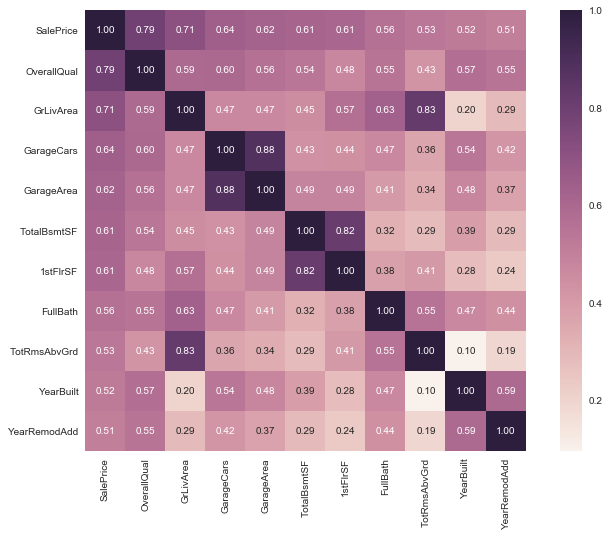

In [89]:
k = 11
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(HousesSold[cols].values.T)
f3=plt.subplots(1, figsize=(12, 9))
sb.set(font_scale=1)
sb.heatmap(cm, cbar=True, annot = True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.subplots_adjust(bottom=0.2)
plt.show()

# *SalePrice*

Thus, we observe that the variable *SalePrice* has considerable relationship (r > 0.5) with the following variables:

 1. *OverallQual*
 2. *GrLivArea*
 3. *GarageCars*
 4. *GarageArea*
 5. *TotalBsmtSF*
 6. *1stFlrSF*
 7.  *FullBath*
 8. *TotRmsAbvGrd*
 9. *YearBuilt*
 10. *YearRemodAdd*

A further investigation reveals that the variables *GrLivArea* and *TotRmsAbvGrd* are strongly correlated with each other, and that absolutely makes sense. We can, therefore, happily drop one of these variables. Let's keep *GrLivArea* and drop *TotRmsAbvGrd*.

Similarly *GarageCars* and *GarageArea* are redundant, we can drop *GarageArea*. We will also keep *TotalBsmtSF* and drop *1stFlrSF*.

We would like to keep other variables as they are strong candidates of being the predictors of *SalePrice* variable. The new list of variables that we would like to use as the predictors of *SalePrice* are:

 1. *OverallQual*
 2. *GrLivArea*
 3. *GarageCars*
 4. *TotalBsmtSF*
 5.  *FullBath*
 6. *YearBuilt*
 7. *YearRemodAdd*

# Scatterplots of strong candidates with the *SalePrice*

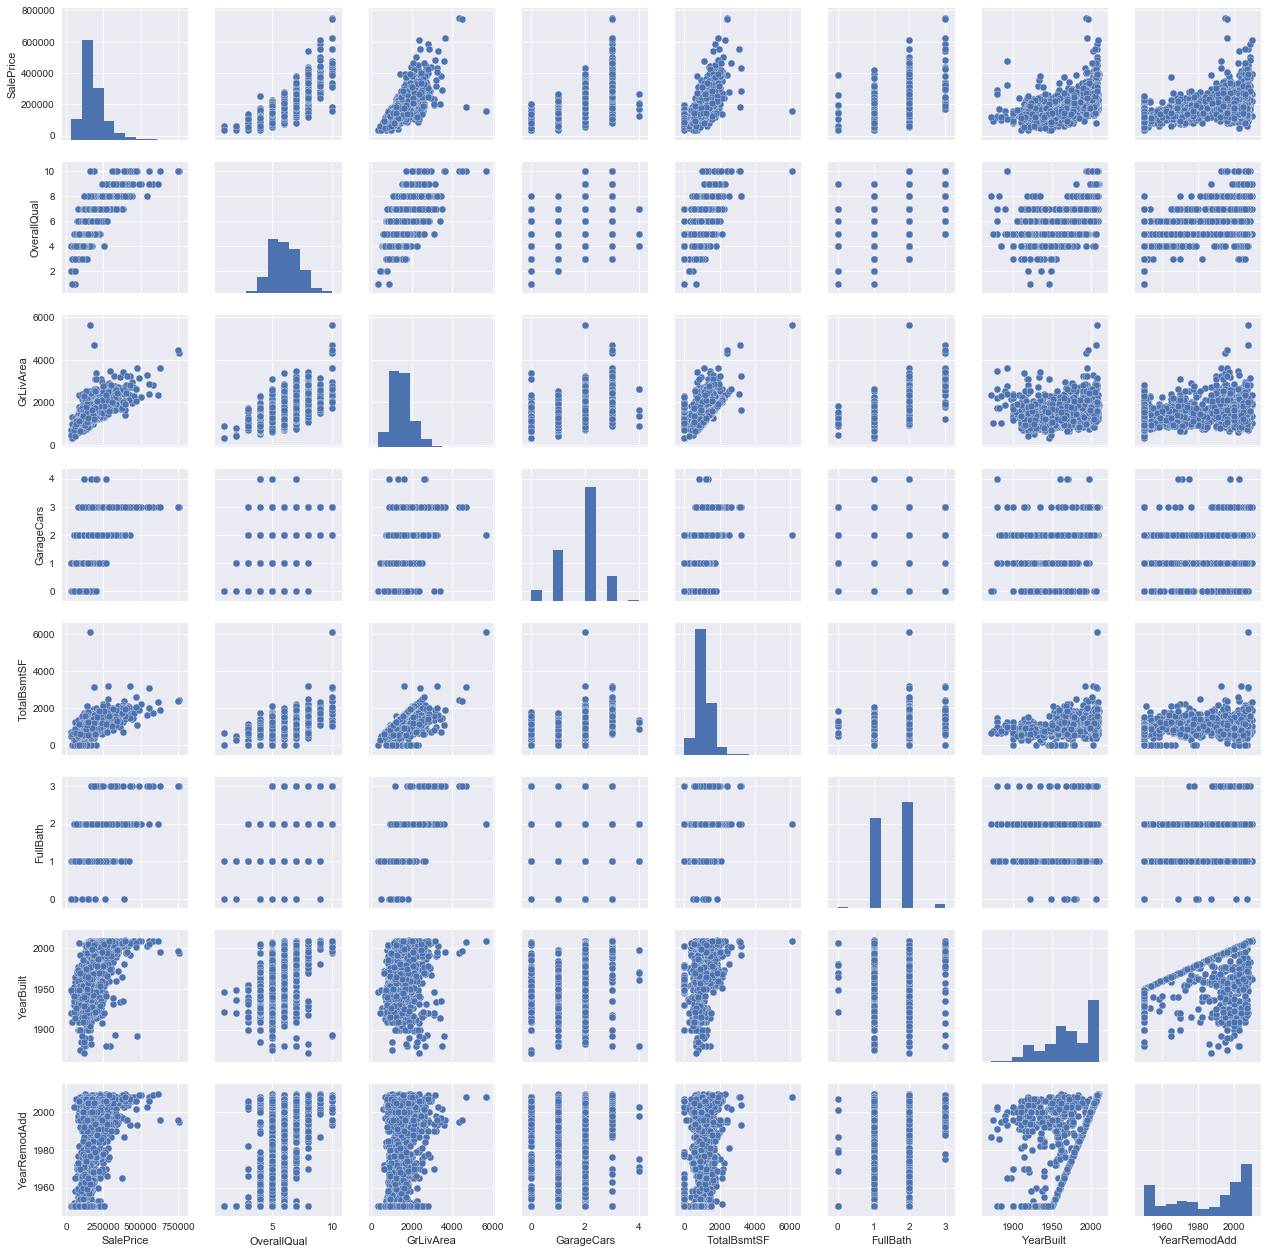

In [90]:
sb.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd']
f4=sb.pairplot(HousesSold[cols], size = 2.2)
plt.show()

A quick observation says that the response variable *SalePrice* is right skewed. The two response variables *GrLivArea* and * TotalBsmtSF* are left skewed, the other three variables *OverallQual*, *GarageCars*, and *FullBath* seem normal. The variable *YearBuilt* is left skewed, whereas *YearRemodAdd* is bimodal.

The scatter plots also show a quick overview of the behaviour of the response variable with the explanatory variables. All these relations are positive (week - moderately strong) and linear/non-linear.

# Missing values

It is important that we remove the variables with the significant number of missing values.

In [91]:
#missing data
allMissing = HousesSold.isnull().sum().sort_values(ascending=False)
percentage = (HousesSold.isnull().sum()/HousesSold.isnull().count()).sort_values(ascending=False)
missingData = pd.concat([allMissing, percentage*100], axis=1, keys=['TotalMissing', 'Percentage'])
missingData.head(20)

,TotalMissing,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


A barplot of the variables with missing values is helpful here. We are okay to drop all these variables except *Electrical* because none of these variables seems to have a serious impact on the response variable. We can drop the observation in the data set *HousesSold* that has missing observation in *Electrical* variable.

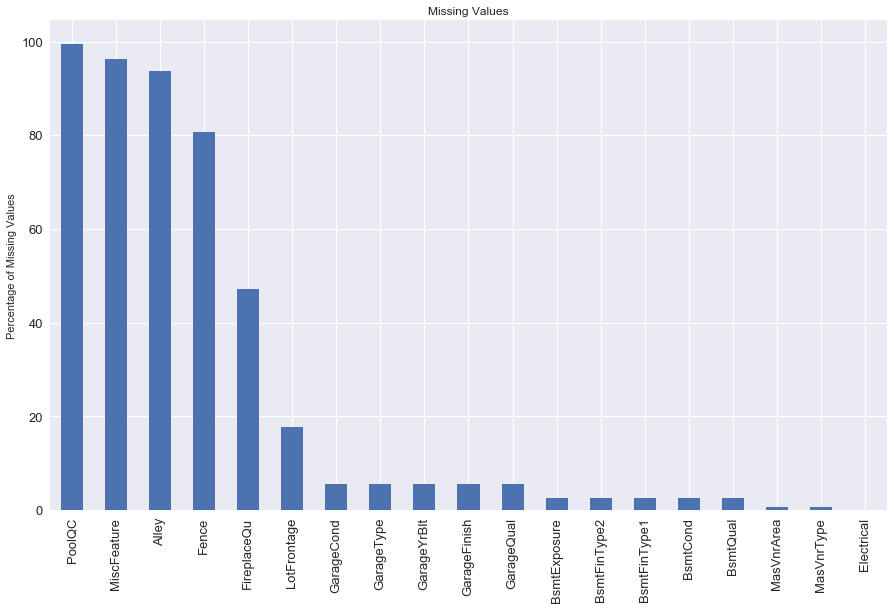

In [92]:
missingData.head(19)[['Percentage']].plot(kind='bar', title ="Missing Values", figsize=(15, 10), legend=False, fontsize=13)
f5=plt.subplots_adjust(bottom=0.2)
plt.ylabel("Percentage of Missing Values")
plt.show()

In [93]:
HousesSold1 = HousesSold.drop((missingData[missingData['TotalMissing'] > 1]).index,1)
HousesSold2 = HousesSold1.drop(HousesSold1.loc[HousesSold1['Electrical'].isnull()].index)
print(HousesSold2.shape)

(1459, 63)


# Transformations

## *SalePrice*

We will apply logarithmic transformation on this variable.

C:\Users\Amjad Ali\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


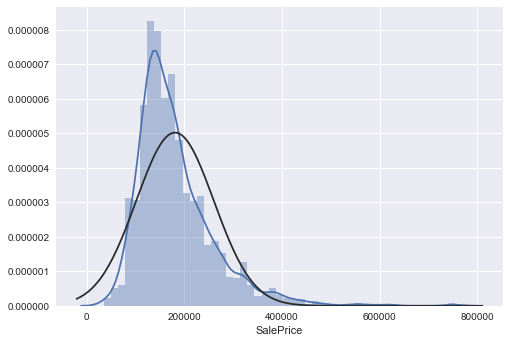

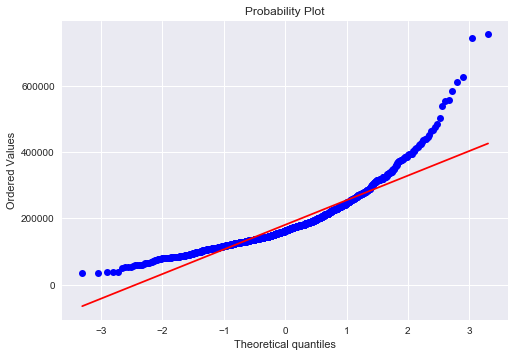

In [94]:
#histogram and normal probability plot
f6=sb.distplot(HousesSold2['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(HousesSold2['SalePrice'], plot=plt)
plt.show()

As agreed before this is a right skewed distribution. The logarithmic distribution might help...

In [95]:
HousesSold2['SalePrice'] = np.log(HousesSold2['SalePrice']);

C:\Users\Amjad Ali\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


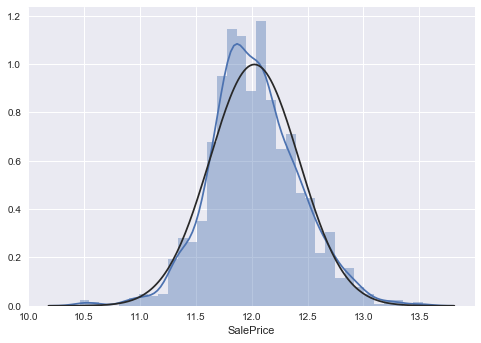

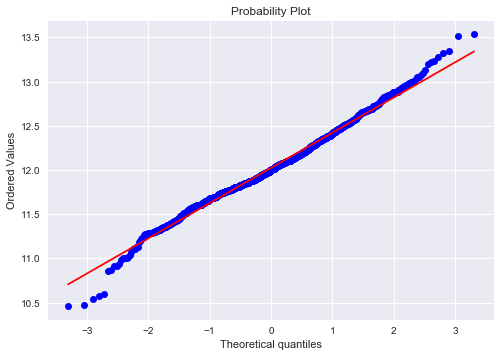

In [96]:
sb.distplot(HousesSold2['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(HousesSold2['SalePrice'], plot=plt)
plt.show()

This looks better.

## *GrLivArea*

C:\Users\Amjad Ali\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


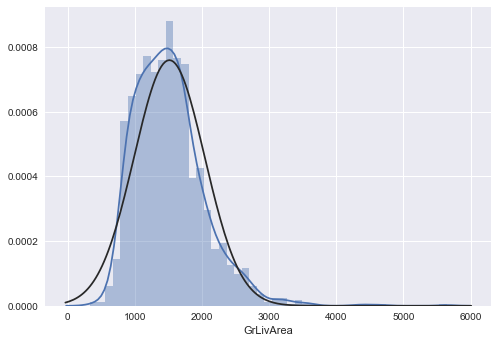

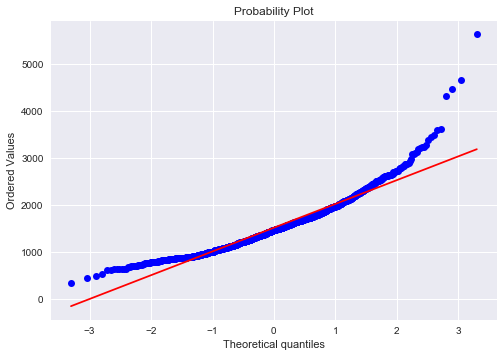

In [97]:
#histogram and normal probability plot
sb.distplot(HousesSold2['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(HousesSold2['GrLivArea'], plot=plt)
plt.show()

We can delete the two extreme values on the right hand side here. Then using log transformation...

In [98]:
HousesSold2.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,11.982929
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,12.126759


In [99]:
HousesSold2 = HousesSold2.drop(HousesSold2[HousesSold2['Id'] == 1299].index)
HousesSold2 = HousesSold2.drop(HousesSold2[HousesSold2['Id'] == 524].index)
HousesSold2['GrLivArea'] = np.log(HousesSold2['GrLivArea'])

C:\Users\Amjad Ali\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


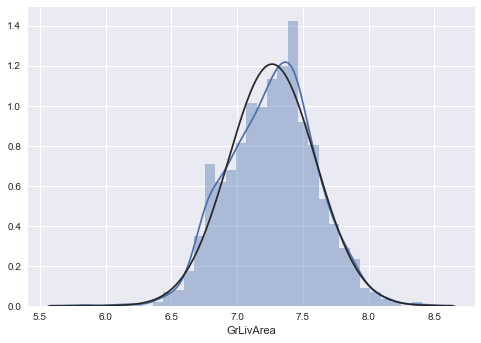

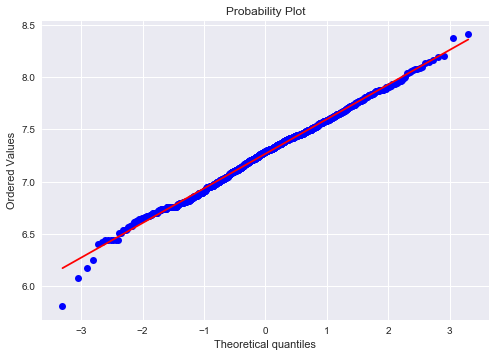

In [100]:
sb.distplot(HousesSold2['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(HousesSold2['GrLivArea'], plot=plt)
plt.show()

Its also good...

## *TotalBsmtSF*

C:\Users\Amjad Ali\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


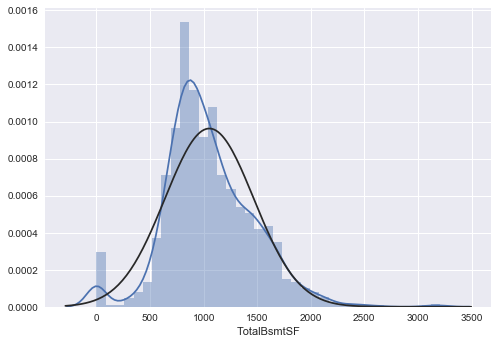

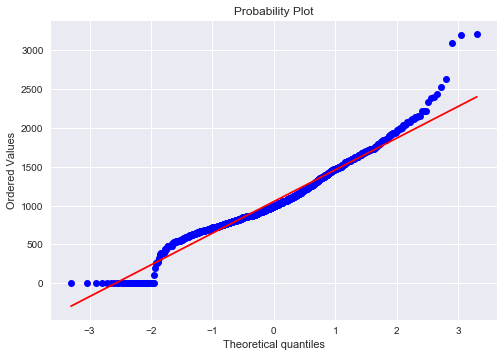

In [101]:
#histogram and normal probability plot
sb.distplot(HousesSold2['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(HousesSold2['TotalBsmtSF'], plot=plt)
plt.show()

We see a slight problem here.... Some observations with zero basement area. We do not want to remove this. For the moment let's not transform this.

## Other variables

We will for the time being keep the other variables as they are and try to look at their relationships with the response variable.

# Relationships with the *SalePrice*
## *OverallQual*

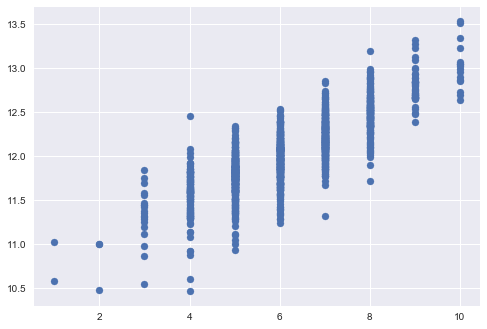

In [102]:
plt.scatter(HousesSold2['OverallQual'], HousesSold2['SalePrice']);
plt.show()

or

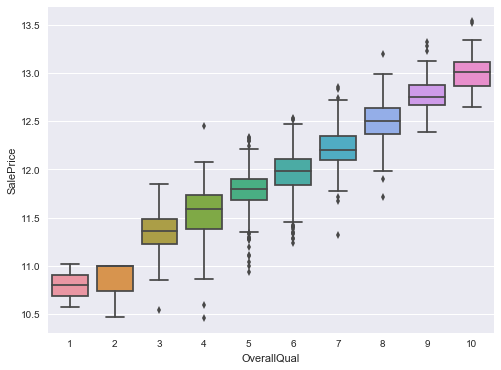

In [103]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sb.boxplot(x="OverallQual", y="SalePrice", data=HousesSold2)
plt.show()

That seems nice and linear relationship.

## *GrLivArea*

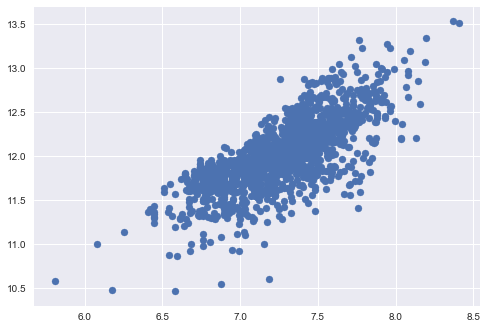

In [104]:
plt.scatter(HousesSold2['GrLivArea'], HousesSold2['SalePrice']);
plt.show()

this is also good.

## *GarageCars*

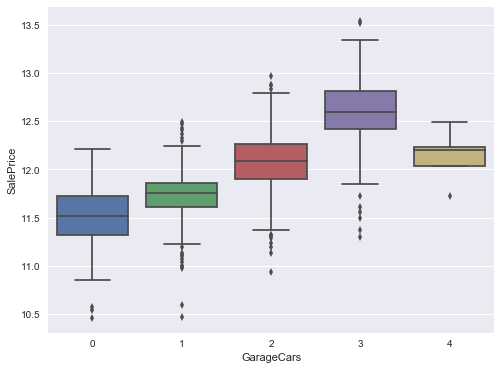

In [105]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sb.boxplot(x="GarageCars", y="SalePrice", data=HousesSold2)
plt.show()

or

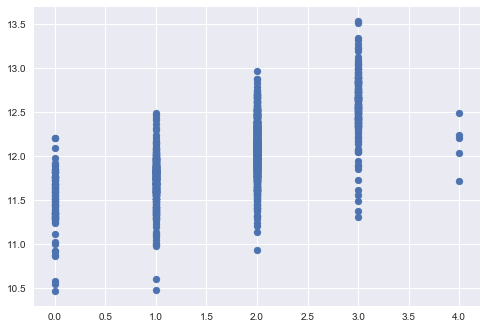

In [106]:
plt.scatter(HousesSold2['GarageCars'], HousesSold2['SalePrice']);
plt.show()

The variable *SalePrice* is related with the *GarageCars* linearly. The drop in house price for a garage of 4 cars space could be for any reason but these are just a few entries which makes this category less significant anyway.

## *TotalBsmtSF*

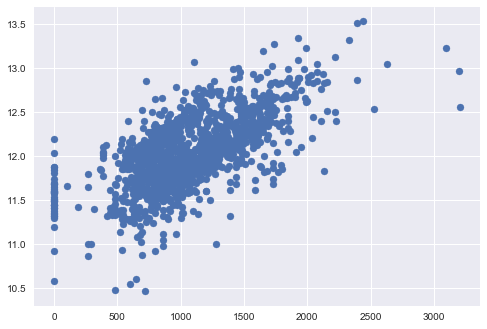

In [107]:
plt.scatter(HousesSold2['TotalBsmtSF'], HousesSold2['SalePrice']);
plt.show()

This looks okay (except for the zeros basement entries). We can, however, remove two outliers with large basement area...

In [108]:
HousesSold2.sort_values(by = 'TotalBsmtSF', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,333,20,RL,10655,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2009,WD,Normal,12.55673
496,497,20,RL,12692,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,291,0,0,0,0,5,2007,WD,Normal,12.97154


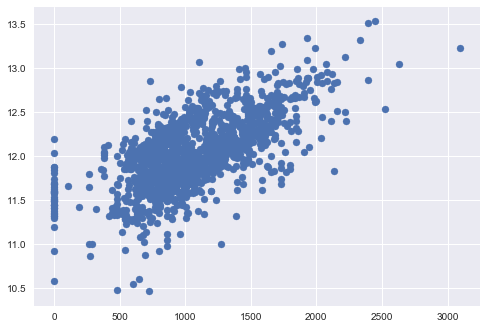

In [109]:
HousesSold2 = HousesSold2.drop(HousesSold2[HousesSold2['Id'] == 333].index)
HousesSold2 = HousesSold2.drop(HousesSold2[HousesSold2['Id'] == 497].index)
plt.scatter(HousesSold2['TotalBsmtSF'], HousesSold2['SalePrice']);
plt.show()

## *FullBath*

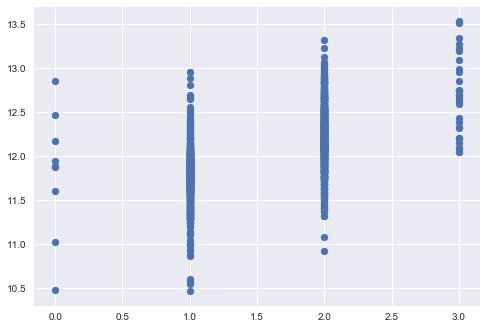

In [110]:
plt.scatter(HousesSold2['FullBath'], HousesSold2['SalePrice']);
plt.show()

or

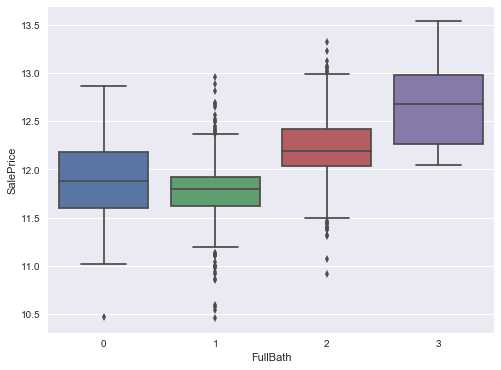

In [111]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sb.boxplot(x="FullBath", y="SalePrice", data=HousesSold2)
plt.show()

Again, there are only a few entries with zero number of full baths, therefore, it is okay that its average position does not lie on the line of relationship.

## *YearBuilt*

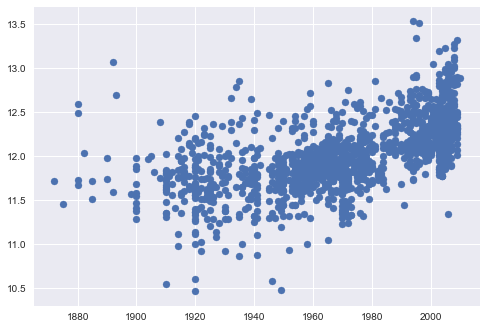

In [112]:
plt.scatter(HousesSold2['YearBuilt'], HousesSold2['SalePrice']);
plt.show()

I will count this as a nonlinear or quadratic relationship with the *SalePrice* variable. Some really old houses are being sold on decent prices probably for their historic nature.

## *YearRemodAdd*

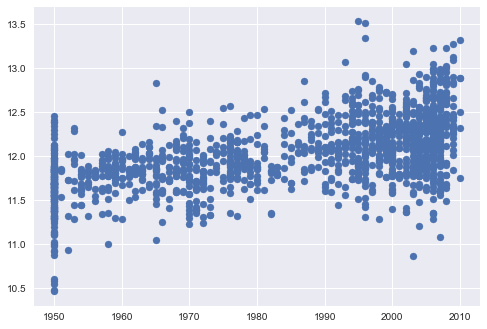

In [113]:
plt.scatter(HousesSold2['YearRemodAdd'], HousesSold2['SalePrice']);
plt.show()

Probably a linear relationship?

# Qualitative Variables
## *MSSubClass*

In [114]:
HousesSold2['MSZoning'].value_counts()

RL         1146
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


# Final Model

The model, we propose to predict the *SalePrice* is:

$$\log SP = a OQ+ b \log GLA + c GC + d TB + e FB + f YB^2 + g YB + h + i YM + j SC + k ND$$


Here:
$a, b, c, d, e, f, g, h, i$ are unknown constants and

$SP$ = *SalePrice*

$OQ$ = *OverallQual*

and so on..

In [115]:
#def func(x, a, b, c, d, e, f, g, h, i, j, k):
#    return a*x[0] + b*x[1] + c*x[2] + d*x[3] + e*x[4] + f*np.power(x[5],2) + g*x[5] + h + i*x[6] + j*x[7] + k*x[8]


xdata = HousesSold2[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt',\
                     'YearRemodAdd', 'MSSubClass', 'Neighborhood', "Condition1","Condition2",\
                     'MSZoning','BldgType', 'HouseStyle', 'KitchenQual', 'SaleType']];
xdata_with_dummies = pd.get_dummies(xdata, columns=["MSSubClass", "Neighborhood", "Condition1", "Condition2", 'MSZoning',\
                                                   'BldgType', 'HouseStyle', 'KitchenQual', 'SaleType'])
ydata=HousesSold2['SalePrice']
#xdummies = pd.get_dummies(xdummies, columns=['MSSubClass'])
print(xdata_with_dummies.columns)
#xdata = np.transpose(xdata);
#ydata = HousesSold2.as_matrix(columns=["SalePrice"]);
#p0 = [0.078, 0.36, -.006, 0.0001,0.12, 0.0000023, -0.0092, 8.03, 0.005, 0.001, 0.01];

#fitParams, fitCovariances = curve_fit(func, xdata, ydata.ravel(), p0)
#print (' fit coefficients:\n', fitParams)


Index(['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath',
       'YearBuilt', 'YearRemodAdd', 'MSSubClass_20', 'MSSubClass_30',
       'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60',
       'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85',
       'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180',
       'MSSubClass_190', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       '

In [116]:
MSSubClass_150 = np.zeros(xdata_with_dummies['MSSubClass_120'].shape)
xdata_with_dummies.insert(19, 'MSSubClass_150', MSSubClass_150)

Condition2_RRNe = np.zeros(xdata_with_dummies['Condition2_RRNn'].shape)
xdata_with_dummies.insert(64, 'Condition2_RRNe', Condition2_RRNe)

KitchenQual_Po = np.zeros(xdata_with_dummies['KitchenQual_Gd'].shape)
xdata_with_dummies.insert(87, 'KitchenQual_Po', KitchenQual_Po)

SaleType_VWD = np.zeros(xdata_with_dummies['SaleType_Oth'].shape)
xdata_with_dummies.insert(97, 'SaleType_VWD', SaleType_VWD)

In [117]:
print(xdata_with_dummies.columns)
print(xdata_with_dummies.shape)

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath',
       'YearBuilt', 'YearRemodAdd', 'MSSubClass_20', 'MSSubClass_30',
       'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60',
       'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85',
       'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_150', 'MSSubClass_160',
       'MSSubClass_180', 'MSSubClass_190', 'Neighborhood_Blmngtn',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighb

In [118]:
alphas = 10**np.linspace(10,-2,100)*0.5

X_train, X_test, y_train, y_test = train_test_split(xdata_with_dummies, ydata, test_size=0.4, random_state=0)



ridgecv = linear_model.RidgeCV(alphas=alphas, scoring='mean_squared_error', normalize=True)
ridgecv.fit(X_train, y_train)
print(ridgecv.alpha_)

0.081487541731


C:\Users\Amjad Ali\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Amjad Ali\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Amjad Ali\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Amjad Ali\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Amjad Ali\A

In [119]:
ridge = linear_model.Ridge(alpha=ridgecv.alpha_, normalize=True)
ridge.fit(X_train, y_train)

Ridge(alpha=0.081487541731032009, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=True, random_state=None, solver='auto',
   tol=0.001)

In [120]:
pred = ridge.predict(X_train) # Use this model to predict the test data
print('Variance score of ridge: %.4f' % ridge.score(X_train, y_train))
print(mean_squared_error(y_train, pred)) # calculate the test MSE

Variance score of ridge: 0.9084
0.014719017463


In [121]:
ridge1 = linear_model.Ridge(alpha=ridgecv.alpha_, normalize=True)
ridge1.fit(xdata_with_dummies, ydata)

Ridge(alpha=0.081487541731032009, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=True, random_state=None, solver='auto',
   tol=0.001)

In [122]:
pred1 = ridge1.predict(xdata_with_dummies) # Use this model to predict the test data
print('Variance score of ridge: %.4f' % ridge1.score(xdata_with_dummies, ydata))
print(mean_squared_error(ydata, pred1)) # calculate the test MSE

Variance score of ridge: 0.8973
0.0163397706307


In [123]:
HousesTest = pd.read_csv('test.csv');
print(HousesTest.shape)
print(HousesTest.columns)

(1459, 80)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 

In [124]:
HousesTest['MSZoning'].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [125]:
print(HousesTest['OverallQual'].shape)

(1459,)


In [126]:
print(HousesTest['Neighborhood'].shape)

(1459,)


In [127]:
HousesTest['GrLivArea1']=np.log(HousesTest['GrLivArea'])
print(HousesTest['GrLivArea'].shape)

(1459,)


In [128]:
print(HousesTest['GarageCars'].shape)

(1459,)


One value is missing, ,most probably this is a home with no garage. We can, therefore, replace that with a zero.

In [129]:
HousesTest['GarageCars'].fillna(0, inplace=True)

In [130]:
print(HousesTest['TotalBsmtSF'].shape)

(1459,)


Again there is a missing value, we can replace this with zero as well.

In [131]:
HousesTest['TotalBsmtSF'].fillna(0, inplace=True)

In [132]:
print(HousesTest['FullBath'].shape)

(1459,)


In [133]:
print(HousesTest['YearBuilt'].shape)

(1459,)


In [134]:
print(HousesTest['YearRemodAdd'].shape)

(1459,)


In [135]:
xdata_test = HousesTest[['OverallQual', 'GrLivArea1', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt',\
                         'YearRemodAdd', 'MSSubClass', 'Neighborhood', "Condition1","Condition2",\
                         'MSZoning','BldgType', 'HouseStyle', 'KitchenQual', 'SaleType']];
xdataT_with_dummies = pd.get_dummies(xdata_test, columns=["MSSubClass", "Neighborhood", "Condition1", "Condition2", 'MSZoning',\
                                                   'BldgType', 'HouseStyle', 'KitchenQual', 'SaleType'])
print(xdataT_with_dummies.columns)
print(xdataT_with_dummies.shape)

Index(['OverallQual', 'GrLivArea1', 'GarageCars', 'TotalBsmtSF', 'FullBath',
       'YearBuilt', 'YearRemodAdd', 'MSSubClass_20', 'MSSubClass_30',
       'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60',
       'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85',
       'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_150', 'MSSubClass_160',
       'MSSubClass_180', 'MSSubClass_190', 'Neighborhood_Blmngtn',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neigh

In [136]:
Condition2_RRAe = np.zeros(xdataT_with_dummies['Condition2_PosN'].shape)
xdataT_with_dummies.insert(62, 'Condition2_RRAe', Condition2_RRAe)

Condition2_RRAn = np.zeros(xdataT_with_dummies['Condition2_RRAe'].shape)
xdataT_with_dummies.insert(63, 'Condition2_RRAn', Condition2_RRAn)

Condition2_RRNe = np.zeros(xdataT_with_dummies['Condition2_RRAn'].shape)
xdataT_with_dummies.insert(64, 'Condition2_RRNe', Condition2_RRNe)

Condition2_RRNn = np.zeros(xdataT_with_dummies['Condition2_RRNe'].shape)
xdataT_with_dummies.insert(65, 'Condition2_RRNn', Condition2_RRNn)

HouseStyle_25Fin = np.zeros(xdataT_with_dummies['HouseStyle_1Story'].shape)
xdataT_with_dummies.insert(79, 'HouseStyle_2.5Fin', HouseStyle_25Fin)
    
KitchenQual_Po = np.zeros(xdataT_with_dummies['KitchenQual_Gd'].shape)
xdataT_with_dummies.insert(87, 'KitchenQual_Po', KitchenQual_Po)    

SaleType_VWD = np.zeros(xdataT_with_dummies['SaleType_Oth'].shape)
xdataT_with_dummies.insert(97, 'SaleType_VWD', SaleType_VWD)

print(xdataT_with_dummies.columns)
print(xdataT_with_dummies.shape)

Index(['OverallQual', 'GrLivArea1', 'GarageCars', 'TotalBsmtSF', 'FullBath',
       'YearBuilt', 'YearRemodAdd', 'MSSubClass_20', 'MSSubClass_30',
       'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60',
       'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85',
       'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_150', 'MSSubClass_160',
       'MSSubClass_180', 'MSSubClass_190', 'Neighborhood_Blmngtn',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neigh

In [137]:
y_predTest = ridge1.predict(xdataT_with_dummies)

In [138]:
y_predTestReal = np.exp(y_predTest);
print(y_predTestReal)
resHousesPrice = pd.DataFrame({'Id':HousesTest['Id'], 'SalePrice':y_predTestReal});

[ 107987.37139972  154495.06972004  172382.23737868 ...,  152727.79614573
  127494.12024984  223481.95646867]


In [139]:
resHousesPrice.to_csv('HousePricesV8_ridge.csv', sep=',', index=False)